### Basic Pre-Processing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

In [2]:
uri = "https://gist.githubusercontent.com/Mathtzt/bff94f903f34938ee79c5c728acc8426/raw/739cc0f482a08bdc2b3440e564a101897bbade64/car_prices_dataset.csv"

In [3]:
dados = pd.read_csv(uri)

In [4]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
## Removendo coluna irrelevante
dados.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
## Mapeando valores da coluna 'sold' para representação binária
sold_dict = {
    'yes': 1,
    'no': 0
}

dados['sold'] = dados['sold'].map(sold_dict)

In [7]:
dados.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [8]:
## criando coluna idade do modelo
current_year = datetime.today().year
dados['model_age'] = current_year - dados['model_year']

In [9]:
dados.head()

,mileage_per_year,model_year,price,sold,model_age
0,21801,2000,30941.02,1,21
1,7843,1998,40557.96,1,23
2,7109,2006,89627.50,0,15
3,26823,2015,95276.14,0,6
4,7935,2014,117384.68,1,7


In [10]:
## criando coluna Km por ano
factor = 1.60934
dados['km_per_year'] = np.round(dados['mileage_per_year'] * factor, 2)
dados.head()

,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,21801,2000,30941.02,1,21,35085.22
1,7843,1998,40557.96,1,23,12622.05
2,7109,2006,89627.50,0,15,11440.80
3,26823,2015,95276.14,0,6,43167.33
4,7935,2014,117384.68,1,7,12770.11


In [11]:
## Removendo colunas irrelevante
dados.drop(columns=['mileage_per_year', 'model_year'], axis=1, inplace=True)

In [12]:
dados.head(2)

,price,sold,model_age,km_per_year
0,30941.02,1,21,35085.22
1,40557.96,1,23,12622.05


In [13]:
## Separando var dependente das explicativas
x = dados[['price',	'model_age', 'km_per_year']]
y = dados['sold']

In [14]:
## Separando dataset em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)

### Baseline with dummy classifier

In [15]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 40)
dummy.fit(x_train, y_train)
accuracy = dummy.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [16]:
print("A acurácia baseline do dummy foi %.2f%%" % (accuracy * 100))

A acurácia baseline do dummy foi 50.27%


### Decision Tree Classifier

In [20]:
model = DecisionTreeClassifier(random_state = 40, max_depth=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("A acurácia foi %.2f%%" % (accuracy * 100))

A acurácia foi 78.70%


### Visualizing the model tree

In [21]:
from sklearn.tree import export_graphviz
import graphviz

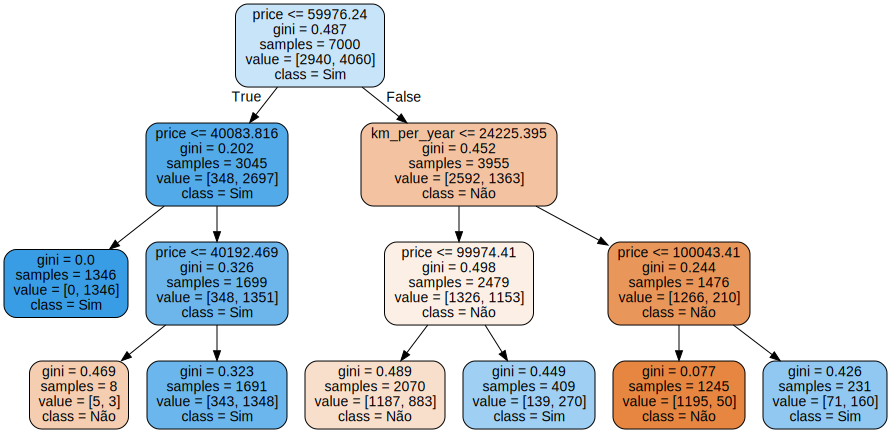

In [22]:
features = x.columns
dot_data = export_graphviz(model, 
                           out_file=None,
                           filled = True,
                           rounded = True, 
                           feature_names=features,
                           class_names = ['Não', 'Sim'])
graph = graphviz.Source(dot_data)
graph